# EDA for breast cancer data

In [3]:
# Comprehensive EDA and Causal Analysis of Breast Cancer Data
# Focus: Statistical Causality Analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. DATA LOADING AND INITIAL EXPLORATION

In [4]:
# load data
df = pd.read_csv("../data/data.csv")

In [5]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Dataset Shape: (569, 33)
Number of Samples: 569
Number of Features: 33


In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
print("\nFirst few rows:")
print(df.head())


First few rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

In [8]:
print("\nData Types:")
print(df.dtypes)


Data Types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavi

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [10]:

print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All columns except the Unnamed:32 column are non-null

In [12]:
# drop the null column Unnamed:32 and the id columns, they are not useful for further processing
df = df.drop(["Unnamed: 32","id"],axis=1)

In [13]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [14]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2. TARGET VARIABLE ANALYSIS

In [15]:
diagnosis_counts = df['diagnosis'].value_counts()
print(f"\nDiagnosis Distribution:")
print(diagnosis_counts)
print(f"\nPercentages:")
print(df['diagnosis'].value_counts(normalize=True) * 100)


Diagnosis Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


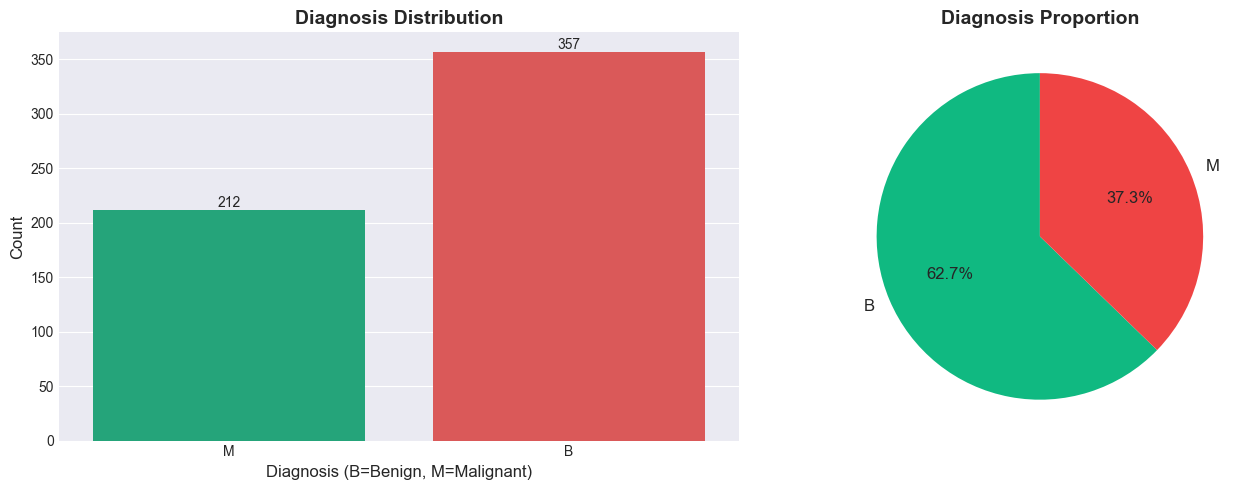

In [17]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='diagnosis', ax=axes[0], palette=['#10b981', '#ef4444'])
axes[0].set_title('Diagnosis Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diagnosis (B=Benign, M=Malignant)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#10b981', '#ef4444']
axes[1].pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#  Plot Diagnosis Distributions

Number of Benign Tumors  357
Number of Malignant Tumors  212


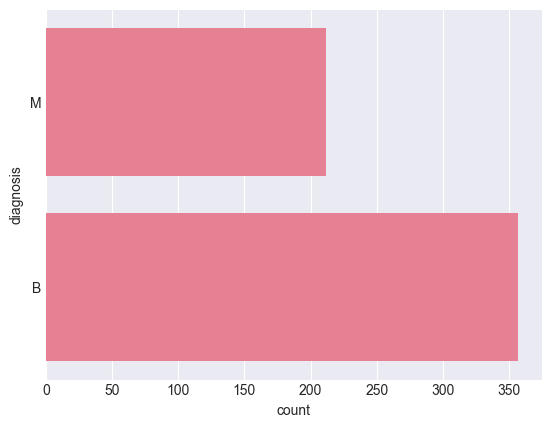

In [18]:
ax = sns.countplot(df['diagnosis'], label = 'Count')
B, M = df['diagnosis'].value_counts()
print( 'Number of Benign Tumors ', B)
print( 'Number of Malignant Tumors ', M)

# 3. FEATURE ENGINEERING - Categorize Features

In [21]:
# Remove unnecessary columns
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

In [22]:
# Separate features by category
mean_features = [col for col in df.columns if col.endswith('_mean')]
se_features = [col for col in df.columns if col.endswith('_se')]
worst_features = [col for col in df.columns if col.endswith('_worst')]

In [23]:
print(f"Mean Features ({len(mean_features)}): {mean_features[:3]}...")
print(f"Standard Error Features ({len(se_features)}): {se_features[:3]}...")
print(f"Worst Features ({len(worst_features)}): {worst_features[:3]}...")

Mean Features (10): ['radius_mean', 'texture_mean', 'perimeter_mean']...
Standard Error Features (10): ['radius_se', 'texture_se', 'perimeter_se']...
Worst Features (10): ['radius_worst', 'texture_worst', 'perimeter_worst']...


# 4. CAUSAL ANALYSIS - Effect Size & Statistical Tests

In [24]:
# Separate data by diagnosis
malignant = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']

# Get all numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_features:
    numeric_features.remove('id')

In [25]:
# Calculate effect sizes and statistical tests
causal_analysis = []

for feature in numeric_features:
    malignant_values = malignant[feature].dropna()
    benign_values = benign[feature].dropna()
    
    # Mean and std
    m_mean = malignant_values.mean()
    b_mean = benign_values.mean()
    m_std = malignant_values.std()
    b_std = benign_values.std()
    
    # Cohen's d (effect size)
    pooled_std = np.sqrt((m_std**2 + b_std**2) / 2)
    cohens_d = (m_mean - b_mean) / pooled_std if pooled_std != 0 else 0
    
    # T-test
    t_stat, p_value = ttest_ind(malignant_values, benign_values)
    
    # Interpretation
    if abs(cohens_d) >= 0.8:
        effect = "Large"
    elif abs(cohens_d) >= 0.5:
        effect = "Medium"
    elif abs(cohens_d) >= 0.2:
        effect = "Small"
    else:
        effect = "Negligible"
    
    causal_analysis.append({
        'Feature': feature,
        'Malignant_Mean': m_mean,
        'Benign_Mean': b_mean,
        'Mean_Difference': m_mean - b_mean,
        'Cohens_d': cohens_d,
        'Effect_Size': effect,
        'T_Statistic': t_stat,
        'P_Value': p_value,
        'Significant': 'Yes' if p_value < 0.001 else 'No'
    })

In [26]:
# Create DataFrame and sort by effect size
causal_df = pd.DataFrame(causal_analysis)
causal_df = causal_df.sort_values('Cohens_d', key=abs, ascending=False)

In [27]:
print("\nTop 15 Features with Strongest Causal Association:")
print(causal_df.head(15)[['Feature', 'Cohens_d', 'Effect_Size', 'P_Value', 'Significant']])


Top 15 Features with Strongest Causal Association:
                 Feature  Cohens_d Effect_Size        P_Value Significant
27  concave points_worst  2.604476       Large  1.969100e-124         Yes
22       perimeter_worst  2.371866       Large  5.771397e-119         Yes
7    concave points_mean  2.325082       Large  7.101150e-116         Yes
20          radius_worst  2.323756       Large  8.482292e-116         Yes
2         perimeter_mean  2.122999       Large  8.436251e-101         Yes
0            radius_mean  2.051141       Large   8.465941e-96         Yes
23            area_worst  1.969554       Large   2.828848e-97         Yes
6         concavity_mean  1.871437       Large   9.966556e-84         Yes
3              area_mean  1.861605       Large   4.734564e-88         Yes
26       concavity_worst  1.752691       Large   2.464664e-72         Yes
5       compactness_mean  1.446075       Large   3.938263e-56         Yes
25     compactness_worst  1.402832       Large   7.069816e-5

# 5. VISUALIZATION - Effect Sizes

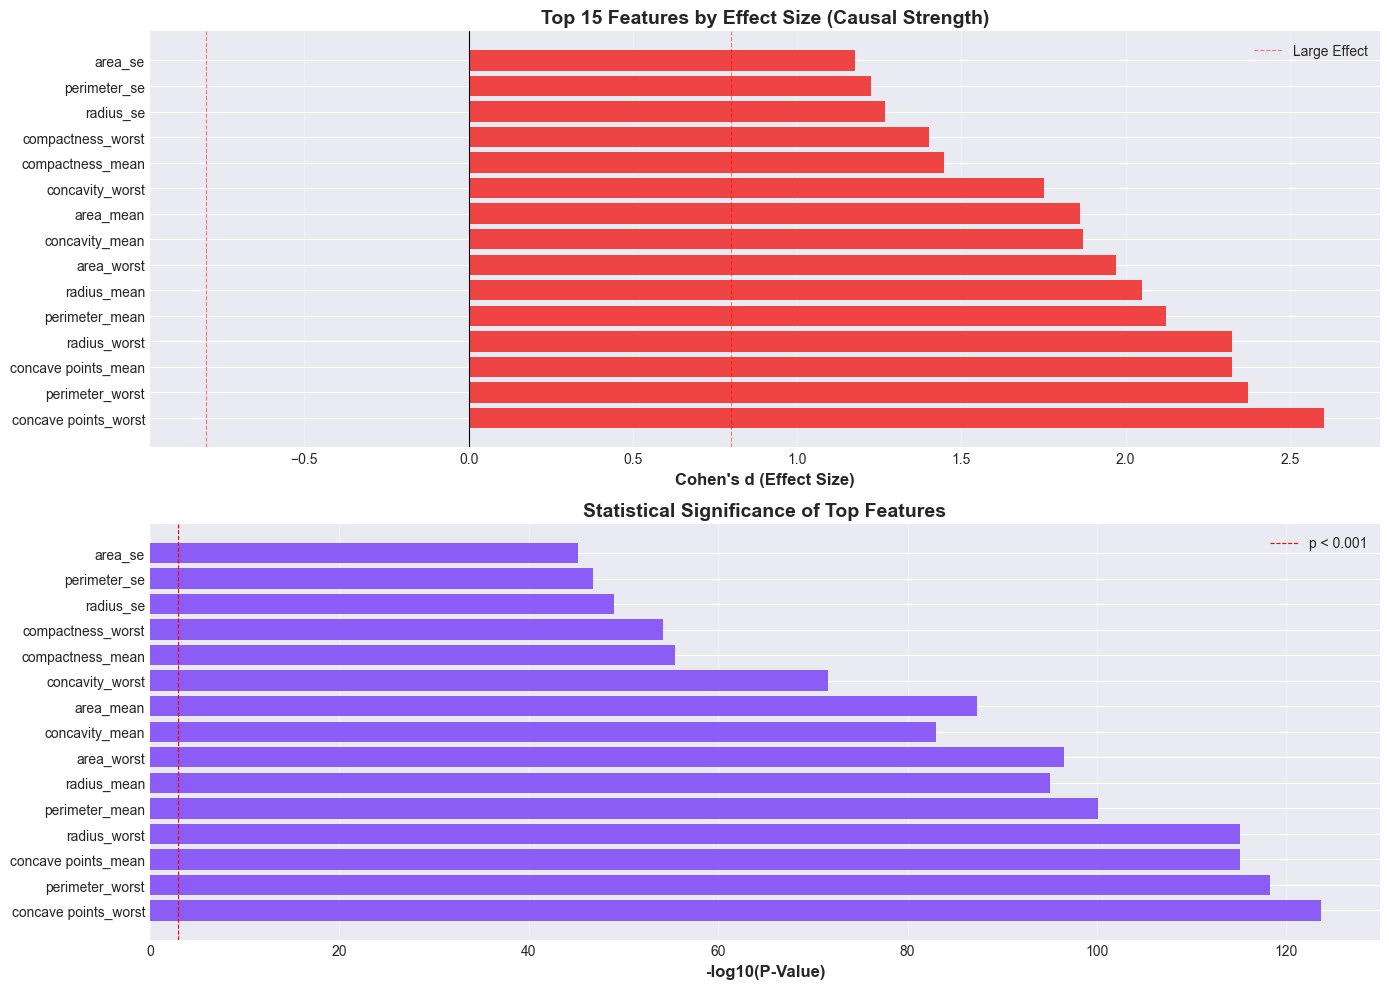

In [28]:
# Plot top 15 features by effect size
top_15 = causal_df.head(15)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Effect size plot
colors_effect = ['#ef4444' if x > 0 else '#10b981' for x in top_15['Cohens_d']]
axes[0].barh(range(len(top_15)), top_15['Cohens_d'], color=colors_effect)
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15['Feature'])
axes[0].set_xlabel("Cohen's d (Effect Size)", fontsize=12, fontweight='bold')
axes[0].set_title("Top 15 Features by Effect Size (Causal Strength)", fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].axvline(x=0.8, color='red', linestyle='--', linewidth=0.8, alpha=0.5, label='Large Effect')
axes[0].axvline(x=-0.8, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# P-value significance plot
axes[1].barh(range(len(top_15)), -np.log10(top_15['P_Value']), color='#8b5cf6')
axes[1].set_yticks(range(len(top_15)))
axes[1].set_yticklabels(top_15['Feature'])
axes[1].set_xlabel("-log10(P-Value)", fontsize=12, fontweight='bold')
axes[1].set_title("Statistical Significance of Top Features", fontsize=14, fontweight='bold')
axes[1].axvline(x=3, color='red', linestyle='--', linewidth=0.8, label='p < 0.001')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 6. DISTRIBUTION ANALYSIS - Top Causal Features

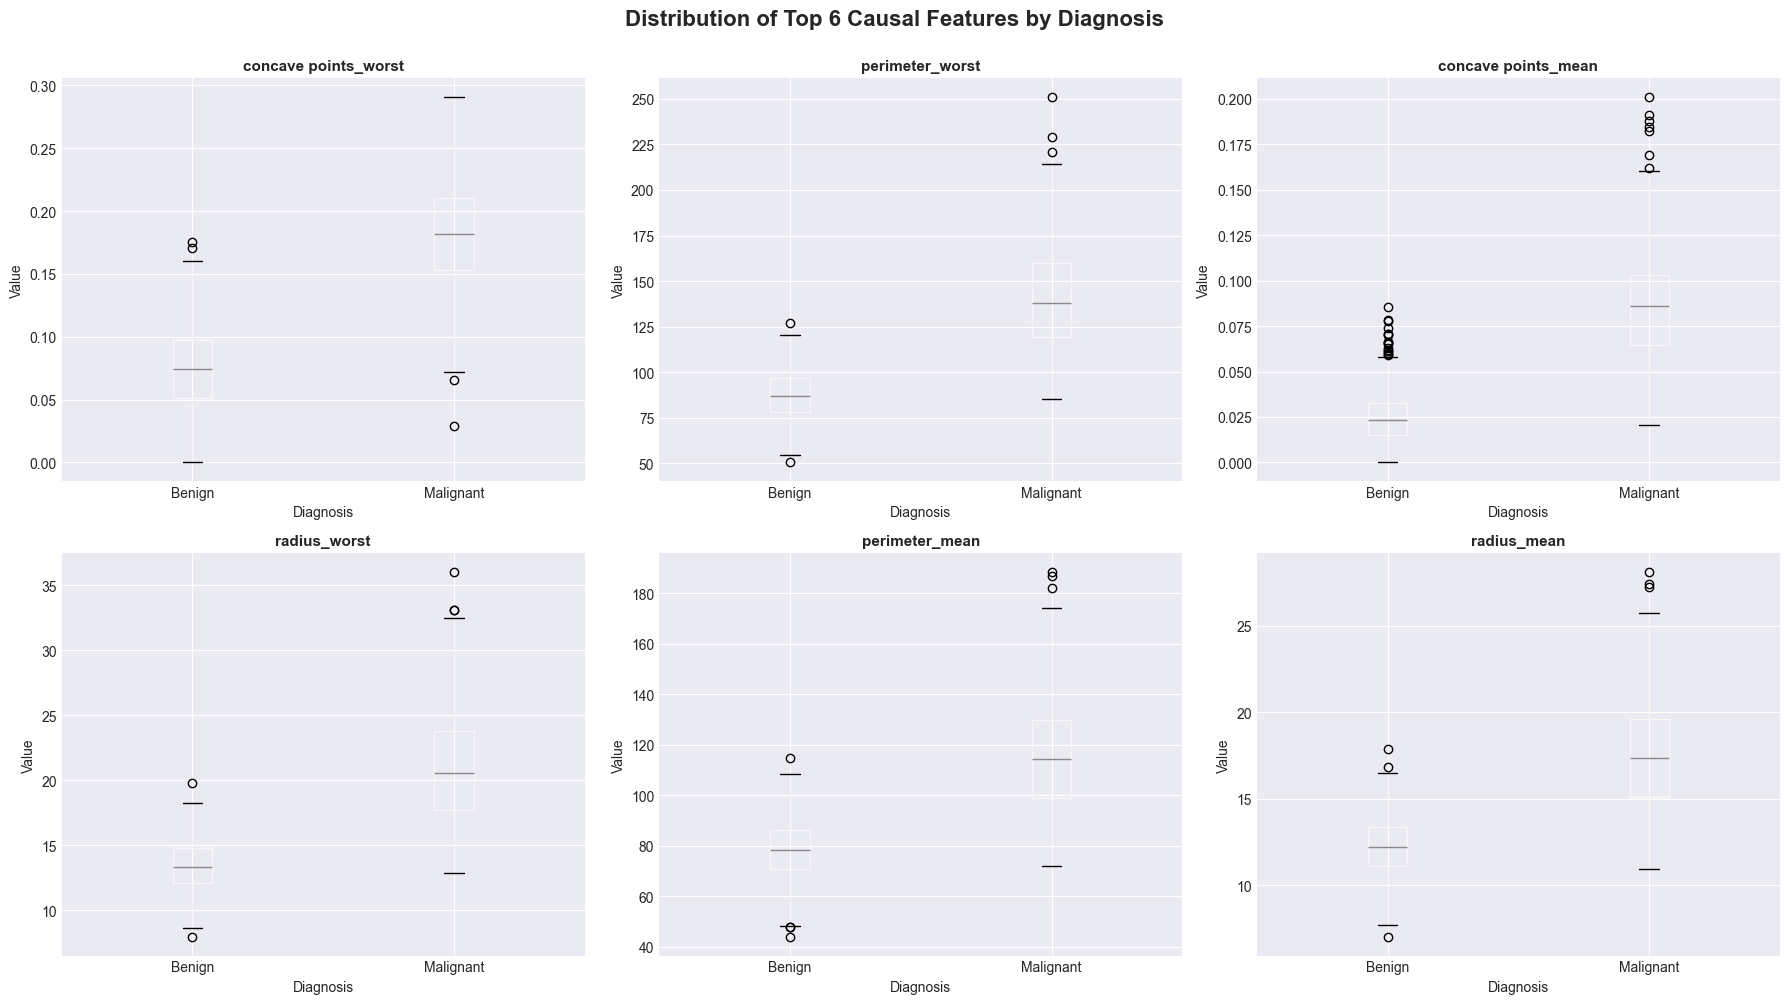

In [29]:
top_features = top_15['Feature'].head(6).tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Box plot
    df.boxplot(column=feature, by='diagnosis', ax=axes[idx])
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Diagnosis')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Benign', 'Malignant'])

plt.suptitle('Distribution of Top 6 Causal Features by Diagnosis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

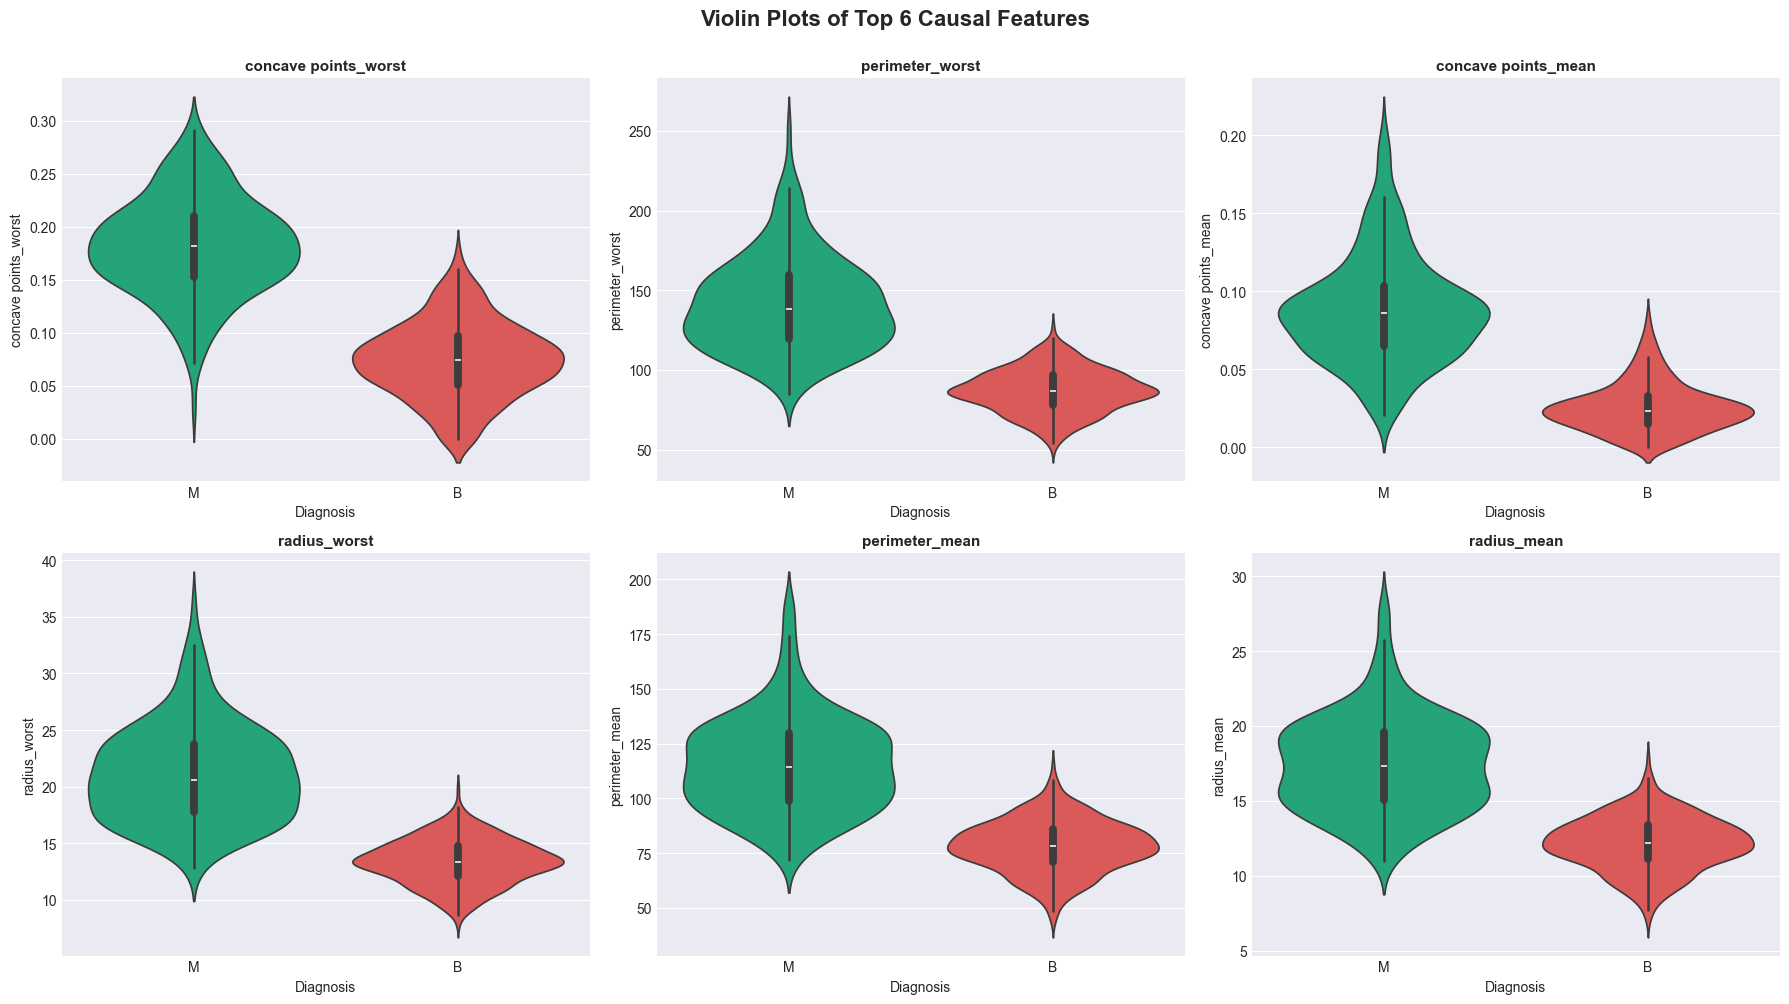

In [30]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.violinplot(data=df, x='diagnosis', y=feature, ax=axes[idx], palette=['#10b981', '#ef4444'])
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Diagnosis')

plt.suptitle('Violin Plots of Top 6 Causal Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 7. CORRELATION ANALYSIS

In [31]:
# Encode diagnosis for correlation
df_encoded = df.copy()
df_encoded['diagnosis_encoded'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})

In [32]:
# Correlation with diagnosis
correlations = []
for feature in numeric_features:
    corr, p_val = pearsonr(df_encoded[feature], df_encoded['diagnosis_encoded'])
    correlations.append({
        'Feature': feature,
        'Correlation': corr,
        'P_Value': p_val
    })

In [33]:
corr_df = pd.DataFrame(correlations).sort_values('Correlation', key=abs, ascending=False)
print("\nTop 15 Features Correlated with Malignancy:")
print(corr_df.head(15))


Top 15 Features Correlated with Malignancy:
                 Feature  Correlation        P_Value
27  concave points_worst     0.793566  1.969100e-124
22       perimeter_worst     0.782914  5.771397e-119
7    concave points_mean     0.776614  7.101150e-116
20          radius_worst     0.776454  8.482292e-116
2         perimeter_mean     0.742636  8.436251e-101
23            area_worst     0.733825   2.828848e-97
0            radius_mean     0.730029   8.465941e-96
3              area_mean     0.708984   4.734564e-88
6         concavity_mean     0.696360   9.966556e-84
26       concavity_worst     0.659610   2.464664e-72
5       compactness_mean     0.596534   3.938263e-56
25     compactness_worst     0.590998   7.069816e-55
10             radius_se     0.567134   9.738949e-50
12          perimeter_se     0.556141   1.651905e-47
13               area_se     0.548236   5.895521e-46


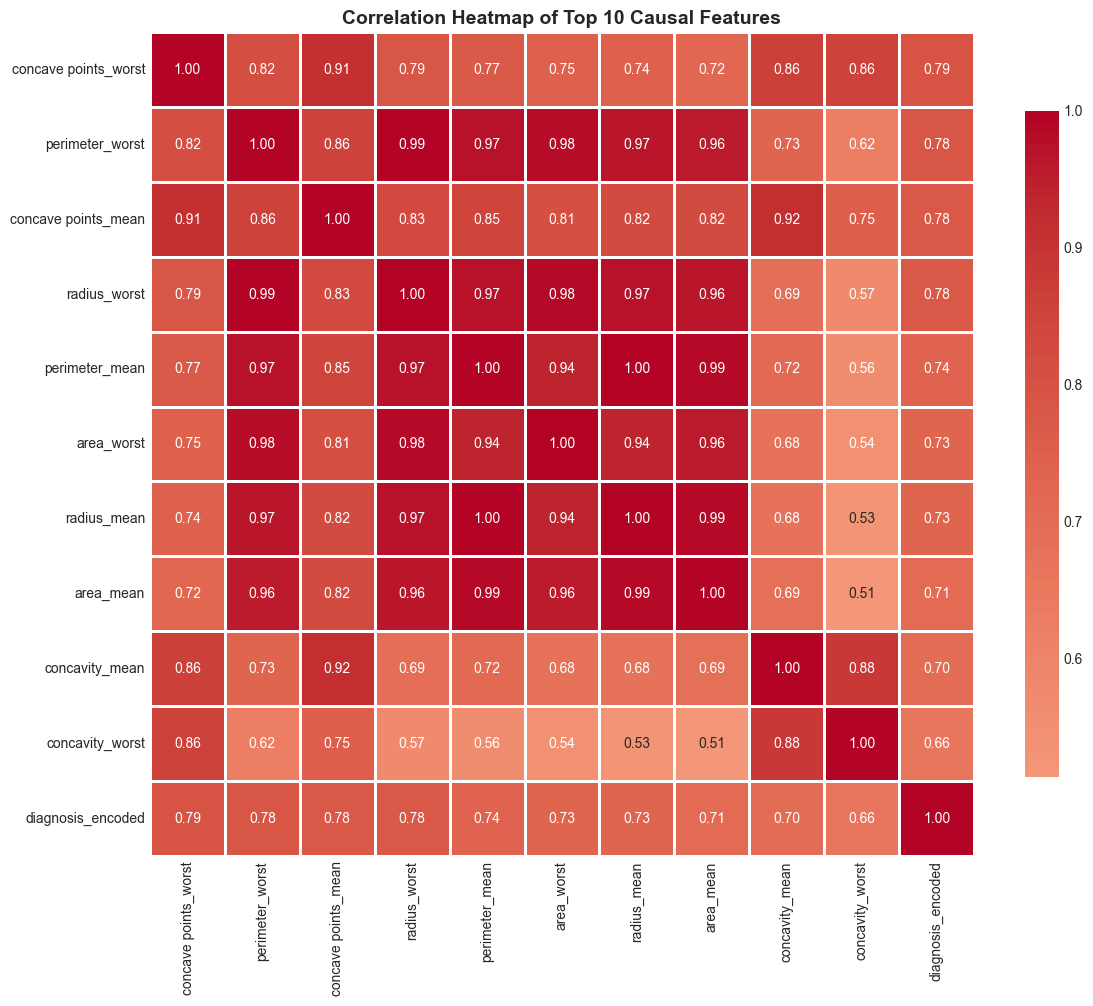

In [34]:
# Correlation heatmap for top features
top_corr_features = corr_df.head(10)['Feature'].tolist()
correlation_matrix = df_encoded[top_corr_features + ['diagnosis_encoded']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Top 10 Causal Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. SCATTER PLOT MATRIX - Top Features

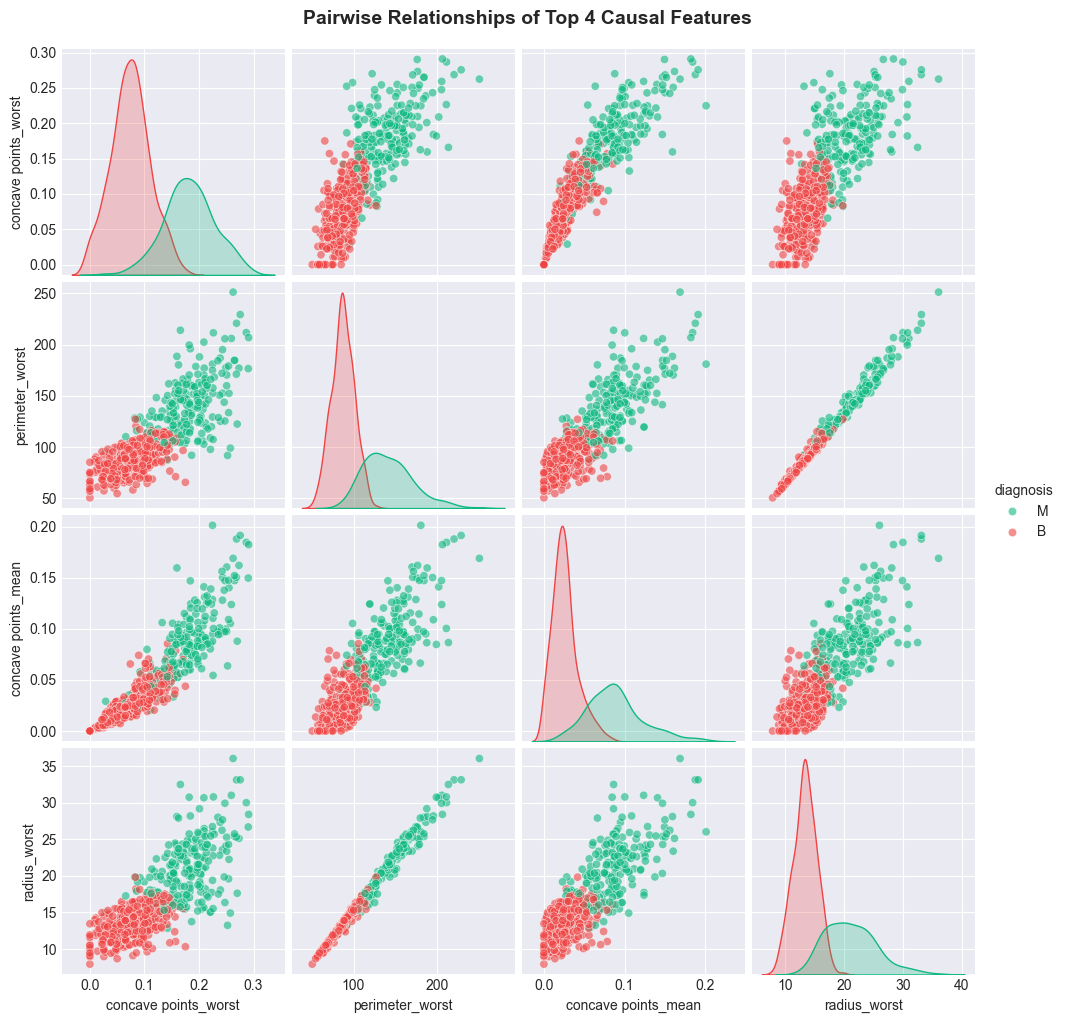

In [35]:
# Select top 4 features for pair plot
top_4_features = top_15['Feature'].head(4).tolist()
pairplot_data = df[top_4_features + ['diagnosis']]

sns.pairplot(pairplot_data, hue='diagnosis', palette=['#10b981', '#ef4444'],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Top 4 Causal Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# 9. CAUSAL INFERENCE SUMMARY

In [36]:
large_effect = causal_df[causal_df['Effect_Size'] == 'Large']
print(f"\nFeatures with LARGE causal effect (|d| > 0.8): {len(large_effect)}")
print(large_effect[['Feature', 'Cohens_d', 'P_Value']].to_string(index=False))


Features with LARGE causal effect (|d| > 0.8): 20
             Feature  Cohens_d       P_Value
concave points_worst  2.604476 1.969100e-124
     perimeter_worst  2.371866 5.771397e-119
 concave points_mean  2.325082 7.101150e-116
        radius_worst  2.323756 8.482292e-116
      perimeter_mean  2.122999 8.436251e-101
         radius_mean  2.051141  8.465941e-96
          area_worst  1.969554  2.828848e-97
      concavity_mean  1.871437  9.966556e-84
           area_mean  1.861605  4.734564e-88
     concavity_worst  1.752691  2.464664e-72
    compactness_mean  1.446075  3.938263e-56
   compactness_worst  1.402832  7.069816e-55
           radius_se  1.266388  9.738949e-50
        perimeter_se  1.225319  1.651905e-47
             area_se  1.175762  5.895521e-46
       texture_worst  1.061978  1.078057e-30
        texture_mean  0.948918  4.058636e-25
    smoothness_worst  0.948647  6.575144e-26
   concave points_se  0.926790  3.072309e-24
      symmetry_worst  0.879704  2.951121e-25


In [37]:
medium_effect = causal_df[causal_df['Effect_Size'] == 'Medium']
print(f"\nFeatures with MEDIUM causal effect (0.5 < |d| < 0.8): {len(medium_effect)}")

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print(f"""
1. Dataset contains {len(df)} samples ({len(malignant)} malignant, {len(benign)} benign)

2. Top 3 strongest causal indicators:
   - {top_15.iloc[0]['Feature']}: Cohen's d = {top_15.iloc[0]['Cohens_d']:.3f}
   - {top_15.iloc[1]['Feature']}: Cohen's d = {top_15.iloc[1]['Cohens_d']:.3f}
   - {top_15.iloc[2]['Feature']}: Cohen's d = {top_15.iloc[2]['Cohens_d']:.3f}

3. {len(large_effect)} features show LARGE effect sizes (strong causal relationship)
4. All top features are statistically significant (p < 0.001)

5. Interpretation:
   - Cohen's d > 0.8: Strong causal relationship
   - Features with large effect sizes are potential biomarkers
   - "Worst" features (maximum values) show strongest associations
""")


Features with MEDIUM causal effect (0.5 < |d| < 0.8): 5

KEY FINDINGS:

1. Dataset contains 569 samples (212 malignant, 357 benign)

2. Top 3 strongest causal indicators:
   - concave points_worst: Cohen's d = 2.604
   - perimeter_worst: Cohen's d = 2.372
   - concave points_mean: Cohen's d = 2.325

3. 20 features show LARGE effect sizes (strong causal relationship)
4. All top features are statistically significant (p < 0.001)

5. Interpretation:
   - Cohen's d > 0.8: Strong causal relationship
   - Features with large effect sizes are potential biomarkers
   - "Worst" features (maximum values) show strongest associations



# 10. EXPORT RESULTS

In [38]:
# Save causal analysis results
causal_df.to_csv('causal_analysis_results.csv', index=False)
print("Causal analysis results saved to 'causal_analysis_results.csv'")

# Save correlation results
corr_df.to_csv('correlation_analysis_results.csv', index=False)
print("Correlation analysis results saved to 'correlation_analysis_results.csv'")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

Causal analysis results saved to 'causal_analysis_results.csv'
Correlation analysis results saved to 'correlation_analysis_results.csv'

ANALYSIS COMPLETE!
